<div class="alert alert-block alert-success"><h3>GITHUB Report</h4></div>

# 1. Starting question

The importance of a national conversation is a cruicial aspect for nation building. However, there is a the lack of refined and summarised data to support this theory is a problem. Based on the news topics of the last decade, which aspects of Australian culture are in need of a conversation?

*Which additional questions might give us insight to the topic development of the last decade?* 

***How do we categorize the news topics?***

***How does the result actually contribute to the possibility of national conversation?***

### 1.2 Relevant data

In [6]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
# import Python libraries
import pandas as pd               # used for tabular datasets
import matplotlib.pyplot 
import numpy as np # linear algebra
import pandas as pd # data processing)
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # used for visualisation purposes

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data3 = pd.read_csv('abcnews-date-text.csv') #read into pd

In [9]:
data2 = pd.read_csv('abcnews-date-text.csv',parse_dates=[0], infer_datetime_format=True) #to be used for insights later
data2.columns = ['date','text']

In [10]:
data3['publish_year'] = data3['publish_date'].apply(lambda x:int(x/9992))

### 1.3 Analysing the data

In [11]:
# How many news headlines are in this dataset?
# We can answer this questions by determining the total number of 
# instances (rows) in our dataset

# The dimensional shape of the dataframe
data3.shape

(1186018, 3)

In [12]:
#We only want the number of rows
data3.shape[0]

1186018

In [13]:
print("There are {} news headlines represented in the data".format(data3.shape[0]))

There are 1186018 news headlines represented in the data


*How can we address our original question: Which words are common among the headline texts?*

*Maybe it would help if we could view the number of topics for each day?*

In [14]:
daily_topics = data2.groupby('date')['text'].count()
daily_topics

date
2003-02-19    198
2003-02-20    250
2003-02-21    250
2003-02-22    126
2003-02-23    136
2003-02-24    250
2003-02-25    250
2003-02-26    250
2003-02-27    221
2003-02-28    249
2003-03-01    176
2003-03-02    168
2003-03-03    232
2003-03-04    215
2003-03-05    239
2003-03-06    214
2003-03-07    209
2003-03-08    124
2003-03-09    164
2003-03-10    217
2003-03-11    220
2003-03-12    226
2003-03-13    224
2003-03-14    229
2003-03-15    134
2003-03-16    119
2003-03-17    226
2003-03-18    226
2003-03-19    225
2003-03-20    219
             ... 
2019-12-02     92
2019-12-03    115
2019-12-04    123
2019-12-05    121
2019-12-06    115
2019-12-07     62
2019-12-08     61
2019-12-09    108
2019-12-10     98
2019-12-11    100
2019-12-12    103
2019-12-13    103
2019-12-14     64
2019-12-15     48
2019-12-16     93
2019-12-17     91
2019-12-18    100
2019-12-19    109
2019-12-20    106
2019-12-21     67
2019-12-22     48
2019-12-23     66
2019-12-24     69
2019-12-25     27
2019-

In [15]:
#Break it down further for listing

reindexed_data = data2['text']
reindexed_data.index = data2['date']
reindexed_data.head()

date
2003-02-19    aba decides against community broadcasting lic...
2003-02-19       act fire witnesses must be aware of defamation
2003-02-19       a g calls for infrastructure protection summit
2003-02-19             air nz staff in aust strike for pay rise
2003-02-19        air nz strike to affect australian travellers
Name: text, dtype: object

**Or better yet, let's find out the total amount of common words among the headlines**

In [16]:
corp = str()
for i in range(len(data3['headline_text'])):
    corp += (' ')+data3['headline_text'][i]

In [17]:
import nltk
words = nltk.word_tokenize(corp)
#data['headline_text'][1] + (' ') + data['headline_text'][2] + data['headline_text'][3]

In [18]:
from nltk.corpus import stopwords # eliminate words which have no meaning
stop_words = set(stopwords.words('english'))
f_words = [w for w in words if not w in stop_words] 

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
fp_words = [w for w in f_words if not w in punctuations] 

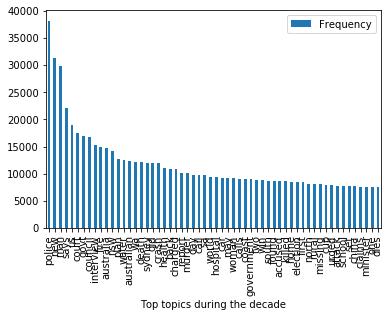

In [19]:
fd = nltk.FreqDist(fp_words) # create for loop

df_fdist = pd.DataFrame.from_dict(fd, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Top topics during the decade'

freq_df = df_fdist[df_fdist['Frequency']>500]
d = freq_df.to_dict()['Frequency']

#plt.figure(figsize=(20, 8))
freq_df1 = df_fdist[df_fdist['Frequency']>7500]
freq_df1.sort_values('Frequency',ascending=False).plot(kind='bar')
#freq_df1.columns

#### Now we could see which words are common among the headline texts

### 1.4 Visualising the results

In [20]:
data3['publish_year'] = data3['publish_date'].apply(lambda x:int(x/10000)) #separate frequency of news topics into years

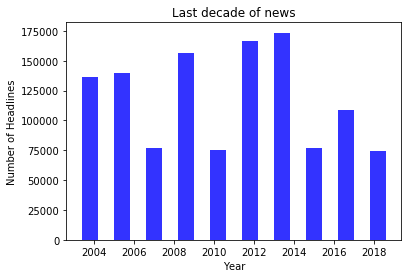

In [21]:
import matplotlib.pyplot as plt
plt.hist(data3['publish_year'], facecolor='blue', alpha=0.8, rwidth = 0.5)
plt.xlabel('Year')
plt.ylabel('Number of Headlines')
plt.title('Last decade of news')
plt.show()

#### Above is the amount of news topics generated during 2004 to 2019

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


<Figure size 2880x2880 with 0 Axes>

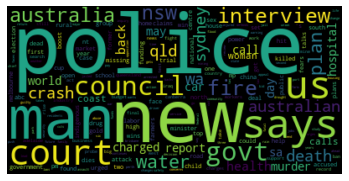

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### The wordcloud shows the most popular "words" used during the last decade and beyond

*How do we use categorize this data into groups? Particularly into news topics?*

### 1.5 Insight

### Let's find a way to group them into news topics

In [24]:
# Grouping of words into news topics
import nltk

Politics = [0]*reindexed_data.shape[0]
World = [0]*reindexed_data.shape[0]
Business = [0]*reindexed_data.shape[0]
Sport = [0]*reindexed_data.shape[0]
Law = [0]*reindexed_data.shape[0]
Emergency = [0]*reindexed_data.shape[0]
Health = [0]*reindexed_data.shape[0]

for i in range(reindexed_data.shape[0]):
    words = TextBlob(reindexed_data[i]).words
    for word in words:
        if word == "politics" or word == "government" or word == "govt" or word == "court": Politics[i]=1
        if word == "world" or word == "finance" or word == "real estate" or word == "international": World[i]=1
        if word == "business" or word == "finance": Business[i]=1
        if word == "sport" or word == "rugby": Sport[i]=1  
        if word == "law" or word == "police" or word == "council" or word == "charged" or word == "accused": Law[i]=1 
        if word == "emergency" or word == "fire" or word == "crash" or word == "murder": Emergency[i]=1 
        if word == "health" or word == "death": Health[i]=1  # as all headlines are in lowercase   
keywords = pd.DataFrame({'text':reindexed_data,
                        'Politics':Politics,
                        'World':World,
                        'Business':Business,
                        'Sport':Sport,
                        'Law':Law,
                        'Emergency':Emergency,
                        'Health':Health},
                        index=reindexed_data.index)

In [25]:
# show summary
monthly = keywords.resample('M').sum()
print(monthly)

            Politics  World  Business  Sport  Law  Emergency  Health
date                                                                
2003-02-28        99     27        11      2  159        103      51
2003-03-31       251    105        13      4  387        183     121
2003-04-30       265     54        24      8  371        172     113
2003-05-31       323     61        29      9  396        167     125
2003-06-30       320     73        25     12  441        150      84
2003-07-31       306     75        21      9  419        172     120
2003-08-31       287     83        26     10  421        218     146
2003-09-30       327     91        26     13  403        188      98
2003-10-31       362    126        36     31  488        185     129
2003-11-30       330     93        26     26  382        160     105
2003-12-31       252     52        27     17  486        174     131
2004-01-31       238     39        23      8  400        179     106
2004-02-29       254     28       

#### Now we see the words grouped into news topics

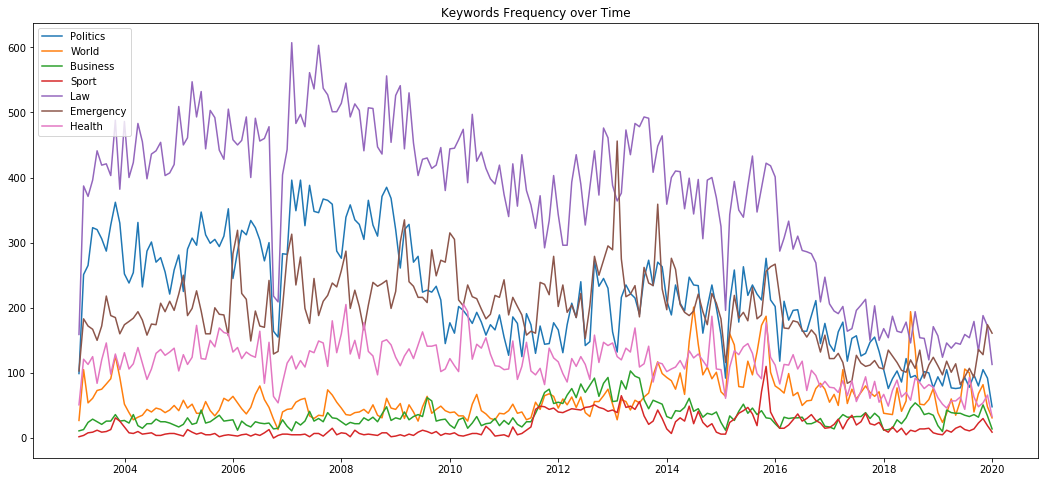

In [26]:
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(monthly['Politics'], label='Politics');
ax.plot(monthly['World'], label='World');
ax.plot(monthly['Business'], label='Business');
ax.plot(monthly['Sport'], label='Sport');
ax.plot(monthly['Law'], label='Law');
ax.plot(monthly['Emergency'], label='Emergency');
ax.plot(monthly['Health'], label='Health');
ax.set_title('Keywords Frequency over Time');
ax.legend(loc='upper left');

<h1>Key points from <font color="red"> 2010 to 2019 </font> :</h1>

   * News topics on "Law" were the most popular out of all the groups (Keep in mind that keywords for Law include "police", "council", etc.)
   * These were primarily keywords that focused on legislation or the process of it (et. al "police")
   
    
   * During early 2013, "Emergency" was trending so much that it was almost able to take the top spot for that time period
   * It could be noted that news on the Victoria bushfires were sought after at this point
   
   
   * Topics on "Politics" were surprisingly trending down from 2009 to 2019
   * It was overtaken numerous times more urgent topics from the "Emergency" section
   
   
   * World news had a spike during early 2016 and 2019, which can be attributed to the US elections (Donald Trump) & China-USA tensions
   * Topics on "Sports" were the least popular in the last decade


***Based on the presented data above, it is safe to assume that Australia's national conversation were predominantly dominated by topics on legislative matters ("Laws"). It comes to no surprise that matters of the "council" or "police" directly affects the economic status and well-being of the average Aussie family. When push comes to shove, more urgent topics such as "bushfires" will come into the limelight as news agencies feel that this is more important. It is worth noting that "Emergency" topics also focus on attention grabbing headlines such as "murder". We may question the media's intention for this: Was the topic made for viewership's sake or from a geniune source of concern? The data also represents the citizen's concern for global topics as they are well aware of international news.*** 

# 2.1 Second question

According to the WHO, mental health is about the state of a peron's wellnes rather than an illness. There is a difference between "mental health" and a mental condition. However, there is no official international guideline on how to effectively tackle mental health issues. Thus, each country uniquely addresses the problems faced by its citizen thru their own wellness programs. Which leads us to the question: 

**How does the frequency of mental health illness and attitudes towards
mental health vary by geographic location?** 

**What are the health effects of its frequency?**

### 2.2 Relevant data

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "mentalhealthsurvey.csv"]).decode("utf8"))

mentalhealthsurvey.csv



In [28]:
df = pd.read_csv('mentalhealthsurvey.csv')
df2 = pd.read_csv('master.csv')

### 2.3 Analysing the data

Let's check the data first

In [29]:
df.head() #show info

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [30]:
df.info() #how many responses were there?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [31]:
#### We can see that some survey questions were lacking answers

In [32]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce') #make an age group
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
df['Age'] = df['Age'].apply(age_process)

Text(0, 0.5, 'Freq')

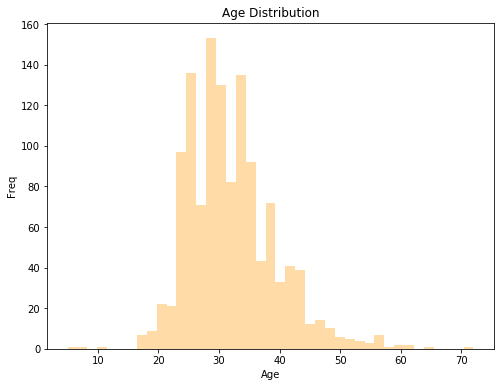

In [33]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#ffa726')
plt.title('Age Distribution')
plt.ylabel('Freq')

df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='%Y-%m-%d') #convert into format
df['Year'] = df['Timestamp'].apply(lambda x:x.year)#### Above is the age distribution of mental health responses
* Most responses were from workers aged around their early 20's to mid 30's
* With the most responses from people aged around 26 - 29
* Worth noticing that there were responses from people below 10 years old, this could be a discrepency

In [34]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='%Y-%m-%d') #convert into format
df['Year'] = df['Timestamp'].apply(lambda x:x.year)

In [35]:
df['Age_Group'] = pd.cut(df['Age'].dropna(), #categorize into age groups
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

#### Do workers have a family history of mental illness?

Text(0.5, 1.0, 'Age vs family_history')

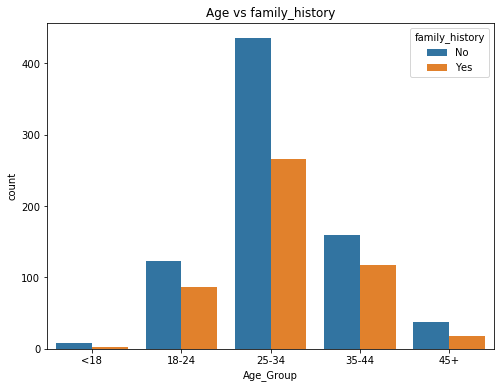

In [36]:
fig,ax = plt.subplots(figsize=(8,6)) #create comparison plot
sns.countplot(data=df,x = 'Age_Group',hue= 'family_history',ax=ax)
plt.title('Age vs family_history')

#### It can be seen that there is a relationship between a person's family history with their mental ilness.

### 1.4 Visualising the results

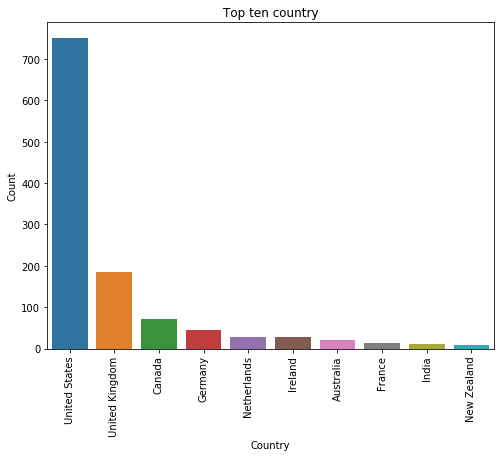

In [37]:
# plot top 10 countries with mental health cases

country_count = Counter(df['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

#### The graph above shows the top 10 countries with the most recorded number of mental illnesses. USA comes into a distant lead over the next country (UK).

Text(0, 0.5, 'Count')

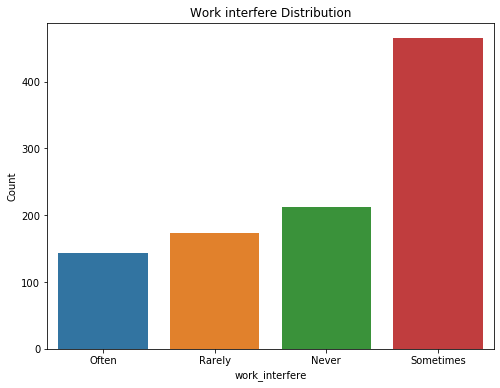

In [38]:
# plot work disturbance responses

fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df['work_interfere'].dropna(),ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

#### Above is the frequency of mental health issue interferences for workers

### 2.5 Insight

Text(0.5, 1.0, 'Age Group vs Treatment')

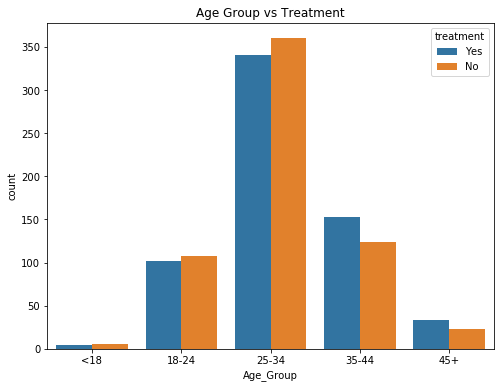

In [39]:
#Create treatment chart

fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'Age_Group', hue='treatment')
plt.title('Age Group vs Treatment')

### Less people diagnosed with mental health problems are seeking treatment. This could possibly be either attributed to the fact that there is either a lack of support or society's stigma as a whole.

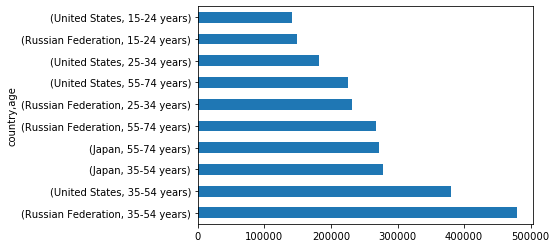

In [40]:
df2.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

#### Above is a chart derived from WHO data. It explains the frequency of diagnosed mental illnesses from developed countries and its suicide rate per million persons.

<h1>Key points from the<font color="blue"> WHO survey</font> analysis:</h1>

    * People with a history of family mental health issues are more likely to suffer the same diagnosis than those who don't have a record.
    * Workers from the early 20's to early 30's seem to be the most vulnerable to developing a mental illness
    * USA and UK had the most reported cases while other countries were lagging
    * The number of people seeking treatment was less than those who did not
    * Majority of mental health related issues only "sometimes" interfered with work
    * Based on suicide rates, the countries of Japan, Russia and USA were prominent on the list at different age groups

# 2.6 Third question

The topic of mental health has lately been trending as an area of interest among the scientific community, particularly its causes and effects within the workspace. Although novel, we a researchers within the tech world would like to know what are the common atittudes towards mental illnesses and what could be the possible predictors for it?

**Based on the survey, what are the atittudes and predictors for mental illness within the tech space?** 

In [41]:
### 2.2 Relevant data

In [42]:
import numpy as np
import pandas as pd
import random as rnd

import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

### 2.3 Analyze data

In [44]:
# Let's get a feel for the data

data.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [45]:
# Another view of the data

data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [46]:
data.loc[(data['What is your age?'] > 90), 'What is your age?'] = 34
data.loc[(data['What is your age?'] < 10), 'What is your age?'] = 34

In [47]:
#### We now have to group the data into Gender roles: Male, Female, etc.

In [48]:
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other
data['What is your gender?'] = data['What is your gender?'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
data['What is your gender?'] = data['What is your gender?'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
data['What is your gender?'] = data['What is your gender?'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

# replace the one null with Male, the mode gender, so we don't have to drop the row
data['What is your gender?'] = data['What is your gender?'].replace(np.NaN, 'Male')
data['What is your gender?'].unique()

array(['Male', 'Female', 'Genderqueer/Other'], dtype=object)

In [49]:
data.drop(['Why or why not?', 'Why or why not?.1'], axis=1, inplace=True)

### 2.9 Visualization

#### Show common mental disorders

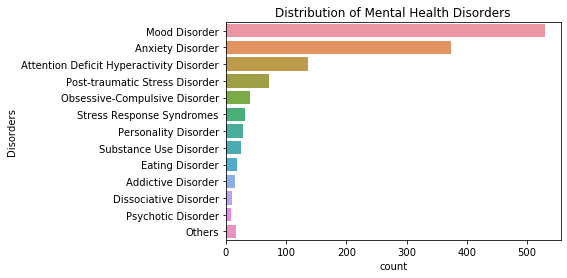

In [50]:
disorders = {}

disorderCounts = dict(data['If so, what condition(s) were you diagnosed with?'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])

tmp[0] = tmp[0].replace([
    'Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace(['Depression'], 'Mood Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

# print(tmp[0].value_counts())
g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()


#### Above we can see that the most common mental health problems in the tech space are mood and anxiety disorders

#### Employee job roles

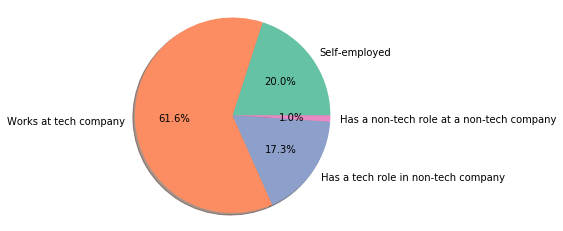

In [51]:
# pie chart of workers
labels = ['Self-employed', 'Works at tech company', 'Has a tech role in non-tech company', 'Has a non-tech role at a non-tech company']
sizes = [data['Are you self-employed?'].value_counts()[1],
         data['Is your employer primarily a tech company/organization?'].value_counts()[1],
         data['Is your primary role within your company related to tech/IT?'].value_counts()[1],
         data['Is your primary role within your company related to tech/IT?'].value_counts()[0]
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

#### A lot of the respodents work for a tech company, while the rest are either self-employed or has a tech role in a non-tech company

#### Mental health among age and gender groups

In [52]:
# shorten column names
data.rename(columns={'What is your age?': 'Age',
                     'What is your gender?': 'Gender',
                     'Do you currently have a mental health disorder?': 'Has MHD'}, inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


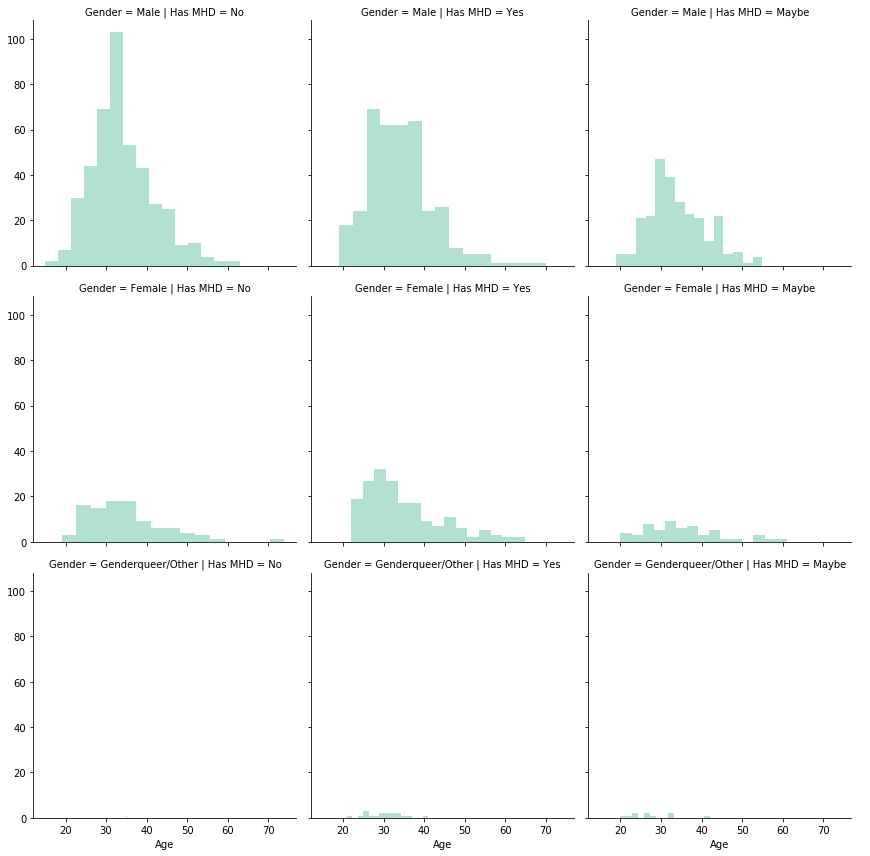

In [53]:
g = sns.FacetGrid(data, row='Gender', col='Has MHD', size=4)
g.map(plt.hist, 'Age', alpha=0.5, bins=15)
g.add_legend()

#### From the charts above, we could see that male respondents aged in their mid 20s to early 30's are more prone to some sort of mental ilness 

#### Attitude: Willingness to Bring Up Health Issues in an Interview: Physical vs. Mental

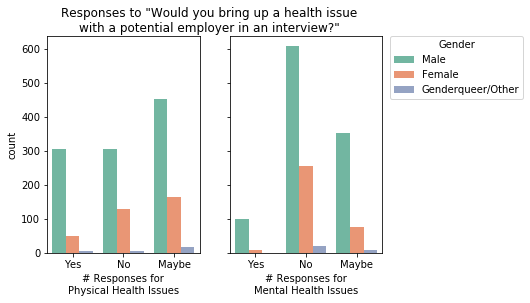

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Responses to "Would you bring up a health issue\nwith a potential employer in an interview?"')
g1 = sns.countplot(x='Would you be willing to bring up a physical health issue with a potential employer in an interview?',
                  hue='Gender', data=data, ax=ax1, order=['Yes', 'No', 'Maybe'])

g2 = sns.countplot(x='Would you bring up a mental health issue with a potential employer in an interview?',
                  hue='Gender', data=data, ax=ax2, order=['Yes', 'No', 'Maybe'])

g1.legend_.remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
g1.set_xlabel('# Responses for\nPhysical Health Issues')
g2.set_xlabel('# Responses for\nMental Health Issues')
g2.set_ylabel('')
plt.show()

*Based on the survey, less males in the tech world are more willing to bring up mental health issues than physical ones.*

#### Attitude: Is Having Mental Health Issues is Harmful to One's Career?

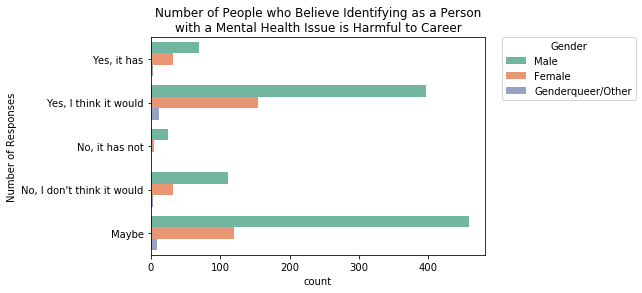

In [55]:
g = sns.countplot(y='Do you feel that being identified as a person with a mental health issue would hurt your career?',
                 hue='Gender', data=data, 
                  order=['Yes, it has', 'Yes, I think it would',
                        'No, it has not', "No, I don't think it would", 'Maybe'])
plt.title('Number of People who Believe Identifying as a Person\nwith a Mental Health Issue is Harmful to Career')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
plt.ylabel('Number of Responses')
plt.show()


In [56]:
*There is more stigma for the male respondents as a lot of them either think mental health issues are harmful to one's career*

SyntaxError: invalid syntax (<ipython-input-56-d9dd37497b93>, line 1)

#### Attitude: Potential Negative Consequences for Discussing Health Issues with Employer: Physical vs. Mental

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Responses to "Do you think that discussing a health issue\nwith your employer would have negative consequences?"')
g1 = sns.countplot(x='Do you think that discussing a physical health issue with your employer would have negative consequences?',
                  hue='Gender', data=data, ax=ax1, order=['Yes', 'No', 'Maybe'])

g2 = sns.countplot(x='Do you think that discussing a mental health disorder with your employer would have negative consequences?',
                  hue='Gender', data=data, ax=ax2, order=['Yes', 'No', 'Maybe'])

g1.legend_.remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
g1.set_xlabel('# Responses for\nPhysical Health Issues')
g2.set_xlabel('# Responses for\nMental Health Issues')
g2.set_ylabel('')
plt.show()

*From the two graphs, we could see that: having disucussions with employers on physical health issues will have less consequences than mental health topics*

### 2.10 Insights

 <h1>Key points from the<font color="green"> Tech survey</font> analysis:</h1>

    * Mood and anxiety disorders were the most common forms of reported illneses, followed by ADHD, PTSD, etc.
    * Most repondents came from a tech company or at least serving traditional a tech role in a non-tech company
   
    * Indicators point that adult males (age 27 - 34) were the most vulnerable out of all the age groups:
  
        * They had an attitude/belief that mental issues were harmful to one's career
        * Discussion with employers on physical health topics had less negative consequences than mental health topics
        * They were less willing to bring up mental health issues in an employee interview

#### References:

Szamil. (2018, August 29). WHO Suicide Statistics. Retrieved from https://www.kaggle.com/szamil/who-suicide-statistics/kernels

*Modified codes from:*

https://www.kaggle.com/andradaolteanu/preprocess-visualise-model-mental-health-in-tech

https://www.kaggle.com/jchen2186/data-visualization-with-python-seaborn

https://www.kaggle.com/kairosart/machine-learning-for-mental-health-1

https://www.kaggle.com/lostarious/most-used-words-in-a-million-headlines

https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda